# Movie Genres Classification Using the Script 

Url: [link](https://github.com/yogeshnile/Movies-Genre-Classification/)

## Import dataset

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re

import nltk

from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [2]:
url_training = "https://raw.githubusercontent.com/yogeshnile/Movies-Genre-Classification/master/kaggle_movie_train.csv"
df_train = pd.read_csv(url_training)

In [3]:
df_train.head()

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama


In [4]:
df_train.columns

Index(['id', 'text', 'genre'], dtype='object')

In [5]:
df_train.shape

(22579, 3)

## Visualize the genre

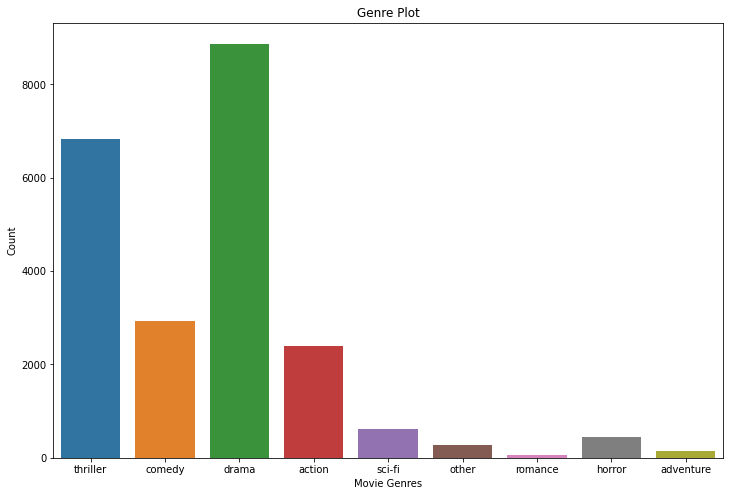

In [7]:
plt.figure(figsize=(12,8))
sns.countplot(x='genre', data=df_train)
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Genre Plot')
plt.show()

## Cleaning and Preprocessing

In [8]:
genres = list(df_train['genre'].unique())
genres.sort()
genres

['action',
 'adventure',
 'comedy',
 'drama',
 'horror',
 'other',
 'romance',
 'sci-fi',
 'thriller']

## Mapping then giving values

In [9]:
df_train.head()

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama


In [10]:
genres_mapper = {'action':0,
                 'adventure':1,
                 'comedy':2,
                 'drama':3,
                 'horror':4,
                 'other':5,
                 'romance':6,
                 'sci-fi':7,
                 'thriller':8}
df_train['genre'] = df_train['genre'].map(genres_mapper)
df_train.head()

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,2,"t, summa cum laude and all. And I'm about to l...",2
2,3,"up Come, I have a surprise.... She takes him ...",3
3,4,ded by the two detectives. INT. JEFF'S APARTME...,8
4,5,"nd dismounts, just as the other children reach...",3


In [11]:
df_train.isna().sum()

id       0
text     0
genre    0
dtype: int64

In [12]:
df_train.isna().any()

id       False
text     False
genre    False
dtype: bool

In [13]:
df_train

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,2,"t, summa cum laude and all. And I'm about to l...",2
2,3,"up Come, I have a surprise.... She takes him ...",3
3,4,ded by the two detectives. INT. JEFF'S APARTME...,8
4,5,"nd dismounts, just as the other children reach...",3
...,...,...,...
22574,28161,n in the world to decide what I'm going to do ...,3
22575,28162,shards. BOJO LAZ! Laz pushes Deke back through...,3
22576,28163,"OTTIE You've got a thing about Ernie's, haven'...",8
22577,28165,....with marked skill and dexterity . LANA wry...,0


In [14]:
df_train.drop('id', axis=1, inplace=True)

## Cleaning

In [15]:
df_train.head()

,text,genre
0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,"t, summa cum laude and all. And I'm about to l...",2
2,"up Come, I have a surprise.... She takes him ...",3
3,ded by the two detectives. INT. JEFF'S APARTME...,8
4,"nd dismounts, just as the other children reach...",3


In [16]:
df_train['genre'].unique()

array([8, 2, 3, 0, 7, 5, 6, 4, 1], dtype=int64)

## Build the Corpus

In linguistics and NLP, corpus (literally Latin for body) refers to a collection of texts. Such collections may be formed of a single language of texts, or can span multiple languages -- there are numerous reasons for which multilingual corpora (the plural of corpus) may be useful.

In [17]:
corpus = []
ps = PorterStemmer()

for i in range(0, df_train.shape[0]):
  dialog = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df_train['text'][i])
  dialog = dialog.lower()
  words = dialog.split()
  dialog_words = [word for word in words if word not in set(stopwords.words('english'))]

  words = [ps.stem(word) for word in dialog_words]
  dialog = ' '.join(words)
  corpus.append(dialog)

The Porter stemming algorithm (or 'Porter stemmer') is a process for removing the commoner morphological and inflexional endings from words in English.

In [18]:
corpus[0:2]

['eadi dead mayb even wish int nd floor hallway three night orderli lead liza door orderli white guy open door step room three white guy mid look wild straight jacket jerri liza reach end rope shake head int decrepit hospit room night ball fetal realli head press cement tri sing jerri blue moon blue moon int nd floor hallway three night liza stand lean rail wall orderli sure go know bad orderli okay liza start hall orderli follow orderli got new patient last week want see liza wave hopeless stop chicken wire window end hall look light break jerri somewher orderli look gotta get back work',
 'summa cum laud launch brand new magazin call expos homag miss juli conroy xenia ohio juli grin juli know find excel editor chief ted yellow page juli let finger walk suddenli music chang peopl ted grin ted play song extend hand dare ask danc juli take hand better ted juli begin danc kiss b g charli jimmi feign tear charli sucker happi end hug jimmi hold start rise nelson hous cloud xenia ted v gues

In [19]:
len(corpus)

22579

In [20]:
drama_words = []
for i in list(df_train[df_train['genre']==4].index):
  drama_words.append(corpus[i])

action_words = []
for i in list(df_train[df_train['genre']==1].index):
  action_words.append(corpus[i])

comedy_words = []
for i in list(df_train[df_train['genre']==3].index):
  comedy_words.append(corpus[i])

horror_words = []
for i in list(df_train[df_train['genre']==5].index):
  horror_words.append(corpus[i])

drama = ''
action = ''
comedy = ''
horror = ''

for i in range(0,3):
  drama += drama_words[i]
  action += action_words[i]
  comedy += comedy_words[i]
  horror += horror_words[i]

## WordCloud

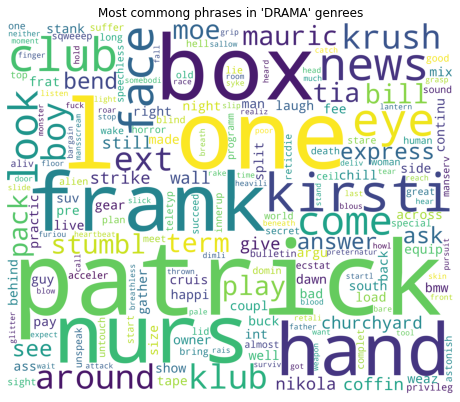

In [21]:
drama_wordcloud = WordCloud(background_color='white', width=3000, height=2500).generate(drama)
plt.figure(figsize=(8,8))
plt.imshow(drama_wordcloud)
plt.axis('off')
plt.title("Most commong phrases in 'DRAMA' genrees")
plt.show()

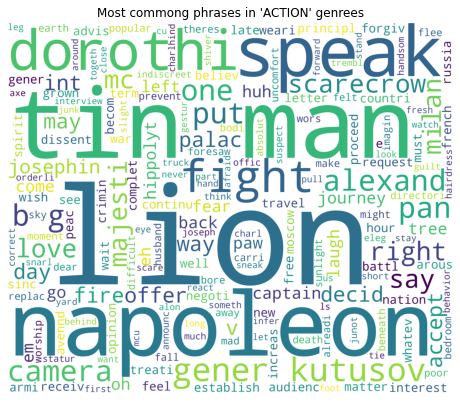

In [22]:
action_wordcloud = WordCloud(background_color='white', width=3000, height=2500).generate(action)
plt.figure(figsize=(8,8))
plt.imshow(action_wordcloud)
plt.axis('off')
plt.title("Most commong phrases in 'ACTION' genrees")
plt.show()

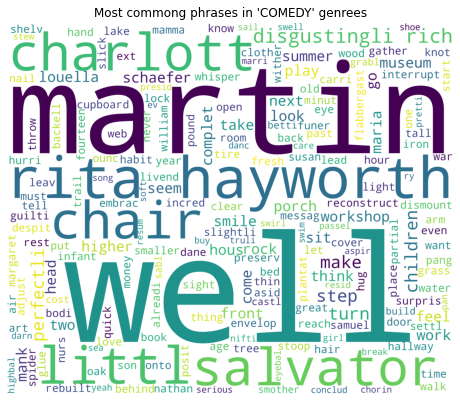

In [23]:
comedy_wordcloud = WordCloud(background_color='white', width=3000, height=2500).generate(comedy)
plt.figure(figsize=(8,8))
plt.imshow(comedy_wordcloud)
plt.axis('off')
plt.title("Most commong phrases in 'COMEDY' genrees")
plt.show()

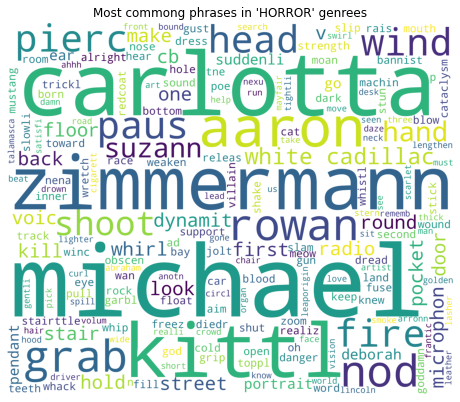

In [24]:
horror_wordcloud = WordCloud(background_color='white', width=3000, height=2500).generate(horror)
plt.figure(figsize=(8,8))
plt.imshow(horror_wordcloud)
plt.axis('off')
plt.title("Most commong phrases in 'HORROR' genrees")
plt.show()

## Bag of Words

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=10000, ngram_range=(1,2))

In [26]:
X = cv.fit_transform(corpus).toarray()
y = df_train['genre'].values

## Model Building

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (16934, 10000), X_test size: (5645, 10000)


## Fitting Naive Bayes to Training Set

In [28]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

## Predicting the test result

In [29]:
nb_y_pred = nb_model.predict(X_test)

## Calculating Accuracy

In [30]:
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test, nb_y_pred)
print("+++Score+++")
print("Accuracy Score is: {}".format(round(score1*100,2)))

+++Score+++
Accuracy Score is: 89.35


## Predictions

In [31]:
def genre_predict(samples):
  samples = re.sub(pattern='[^a-zA-Z]', repl=' ', string=samples)
  samples = samples.lower()
  samples_words = samples.split()
  samples_words = [word for word in samples_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  finals = [ps.stem(word) for word in samples_words]
  finals = ' '.join(finals)
  temp = cv.transform([finals]).toarray()
  return nb_model.predict(temp)[0]

## Loading test dataset

In [33]:
url_test = "https://raw.githubusercontent.com/yogeshnile/Movies-Genre-Classification/master/kaggle_movie_test.csv"

df_test = pd.read_csv(url_test)

In [34]:
df_test.head()

,id,text
0,1,glances at her. BOOK Maybe I ought to learn t...
1,8,hout breaking stride. Tatiana sees her and can...
2,13,dead bodies. GEORDI Mitchell... DePaul... LANG...
3,24,take myself. BRANDON How bad is the other thi...
4,38,"her body to shield his own. KAY Freeze it, Bug..."


In [35]:
df_test.columns

Index(['id', 'text'], dtype='object')

In [36]:
df_test.shape

(5589, 2)

In [37]:
df_test.drop('id', axis=1, inplace=True)

## Predicting Values

In [39]:
from random import randint
row = randint(0, df_test.shape[0]-1)
samples = df_test.text[row]

print('Script: {}'.format(samples))
value = genre_predict(samples)
print('Predictions: {}'.format(list(genres_mapper.keys())[value]))

Script: ut. He starts to cry. Chef hands him a hanky. CHEF Here you go Satan SATAN Thank you. Give me the proofs of purchases. Kenny hands them to Satan. SATAN Okay Kenny, I will keep the bargain. Any wish you want is yours. TRACK IN slowly on Kenny. MUSIC BUILDS. Finally, Kenny speaks. KENNY Mph rmph rmpg rmph mm. Everyone GASPS!! KYLE WHAT? STAN Are you sure, Kenny? SATAN What did he say? STAN He said that his wish is for everyone who died in the war to come back. CHEF Kenny, you realize this wish is the only chance for YOU not to be dead... KENNY M mprh. Mph rmph rm rmph rm rmphm rmphm. Mm rmphm rmphm rhmphm. Triumphant music plays, as if Kenny is giving a grand, important speech. SATAN Very well, then. I will put an end to the war as your wish and make everything as it was before the war started. But you Kenny, must remain dead. KENNY Mph rm. Satan turns to the open abyss. SATAN I must admit, I'm kind of relieved. It's too fucking cold up here. STAN Aren't there cold parts of hell?